In [16]:
from geopy.geocoders import Nominatim
from geopy.distance import vincenty

def distance(city1,city2):
    geolocator = Nominatim()
    location1 = geolocator.geocode(city1)
    location2 = geolocator.geocode(city2)
    city1_cor=(location1.latitude, location1.longitude)
    city2_cor=(location2.latitude, location2.longitude)
    return vincenty(city1_cor,city2_cor).miles






In [18]:
time=[x for x in range(2005,2017)]

In [19]:
time

[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [30]:
bj='beijing'
m='mclean,VA'
v='vienna,VA'
bt='boston,MA'
ar='arlington,VA'
pgh='pittsburgh,PA'
hd_bj="haidian,beijing"
cy_bj="chaoyang,beijing"

cl_loc=[hd_bj,pgh,pgh,pgh,pgh,pgh,pgh,m,m,m,v,bt]
sq_loc=[cy_bj,pgh,pgh,pgh,pgh,pgh,bj,ar,ar,m,m,m]
print len(sq_loc)==len(time)

True


In [31]:
dists=[]
for i in range(len(cl_loc)):
    dist=distance(cl_loc[i],sq_loc[i])
    dists.append(dist)
for i in range(len(dists)):
    if dists[i]==0.0:
        dists[i]=0.5

In [38]:
dists

[21.271339758283137,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 6806.0305034071225,
 5.877518284775522,
 5.877518284775522,
 0.5,
 5.236915796413699,
 398.92584564981775]

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline


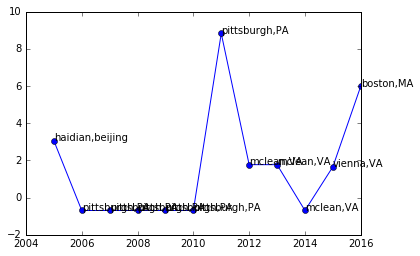

In [72]:
import numpy as np
dists_log=np.log(np.array(dists))
fig,ax=plt.subplots()

ax.plot(time,dists_log,marker='o')
#ax.title('Lin and Qianqian distance')
#ax.ylabel('log distance in mile')

for i, txt in enumerate(cl_loc):
    ax.annotate(txt, (time[i],dists_log[i]))


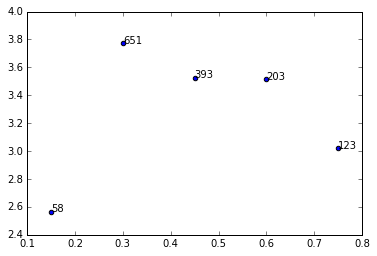

In [68]:
y=[2.56422, 3.77284,3.52623,3.51468,3.02199]
z=[0.15, 0.3, 0.45, 0.6, 0.75]
n=[58,651,393,203,123]

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i],y[i]))

In [61]:
cl_loc

['haidian,beijing',
 'pittsburgh,PA',
 'pittsburgh,PA',
 'pittsburgh,PA',
 'pittsburgh,PA',
 'pittsburgh,PA',
 'pittsburgh,PA',
 'mclean,VA',
 'mclean,VA',
 'mclean,VA',
 'vienna,VA',
 'boston,MA']